In [1]:
from google.colab import files
uploaded = files.upload()

Saving Lima_Data.csv to Lima_Data.csv


In [2]:
# قراءة بيانات الداتا
import pandas as pd

lima_df = pd.read_csv("Lima_Data.csv")
print("✅ تم تحميل Lima_Data.csv بنجاح")
print("عدد السطور:", len(lima_df))
lima_df.head()

✅ تم تحميل Lima_Data.csv بنجاح
عدد السطور: 100


,Player1,Player2,Result
0,paper,paper,draw
1,paper,rock,win
2,rock,paper,lose
3,rock,rock,draw
4,rock,rock,draw


In [19]:
# رفع ملف البيانات الثاني (مرح)
from google.colab import files
uploaded = files.upload()

# قراءة الملف المرفوع
for fname in uploaded:
    other_df = pd.read_csv(fname)
    other_name = fname
    print(f"✅ تم تحميل ملف: {other_name}")
    break

other_df.head()

Saving Marah_Data.csv to Marah_Data (1).csv
✅ تم تحميل ملف: Marah_Data (1).csv


,Player1,Player2,Result
0,scissor,scissor,tie
1,paper,paper,tie
2,rock,rock,tie
3,scissor,rock,lose
4,scissor,paper,win


In [4]:
# توحيد نتائج tie → draw
def normalize_result(value):
    if isinstance(value, str):
        v = value.strip().lower()
        if v == "tie":
            return "draw"
        return v
    return value

lima_df["Result"] = lima_df["Result"].apply(normalize_result)
other_df["Result"] = other_df["Result"].apply(normalize_result)

print("🛠️ تم توحيد النتائج (tie → draw)")

🛠️ تم توحيد النتائج (tie → draw)


In [18]:
# حساب تكرار كل نتيجة
lima_counts = lima_df["Result"].value_counts()
other_counts = other_df["Result"].value_counts()

# تأكيد ظهور النتائج
print("📊 نتائج ليما:\n", lima_counts)
print("📊 نتائج مرح:\n", other_counts)


📊 نتائج ليما:
 Result
win     37
draw    33
lose    30
Name: count, dtype: int64
📊 نتائج مرح:
 Result
draw    48
lose    31
win     21
Name: count, dtype: int64


<ipython-input-20-dc27d3719603>:20: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


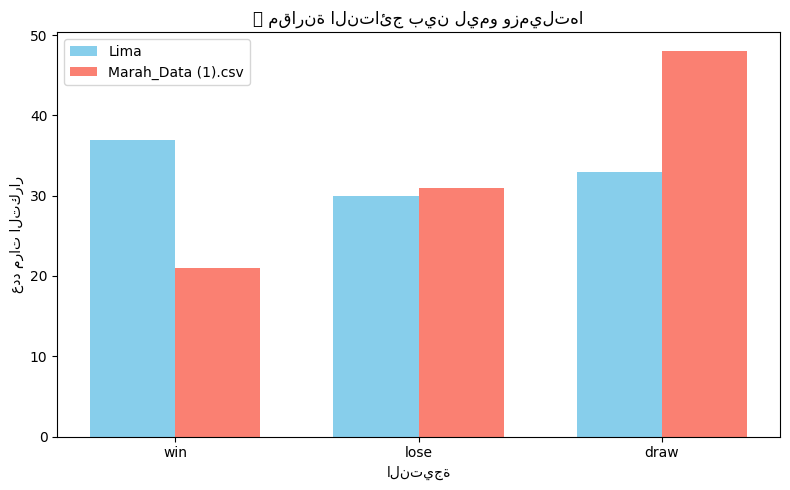

In [20]:
# رسم مقارنة النتائج بين ليما ومرح
import matplotlib.pyplot as plt

results = ["win", "lose", "draw"]
lima_values = [lima_counts.get(r, 0) for r in results]
other_values = [other_counts.get(r, 0) for r in results]

x = range(len(results))
bar_width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x, lima_values, width=bar_width, label="Lima", color="skyblue")
plt.bar([i + bar_width for i in x], other_values, width=bar_width, label=other_name, color="salmon")

plt.xlabel("النتيجة")
plt.ylabel("عدد مرات التكرار")
plt.title("📊 مقارنة النتائج بين ليمو وزميلتها")
plt.xticks([i + bar_width / 2 for i in x], results)
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
import pandas as pd

# قراءة بيانات ليما
df = pd.read_csv("Lima_Data.csv")
df.head()


,Player1,Player2,Result
0,paper,paper,draw
1,paper,rock,win
2,rock,paper,lose
3,rock,rock,draw
4,rock,rock,draw


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


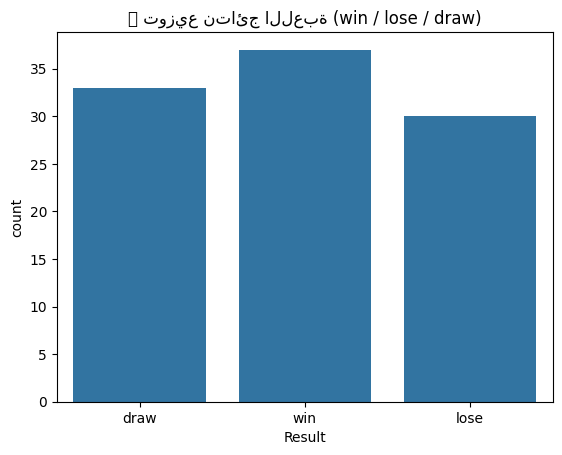

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# توحيد الكلمات مثل tie → draw
df["Result"] = df["Result"].str.lower().replace("tie", "draw")

# توزيع النتائج
sns.countplot(x="Result", data=df)
plt.title("🎯 توزيع نتائج اللعبة (win / lose / draw)")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129485 (\N{STANDING PERSON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


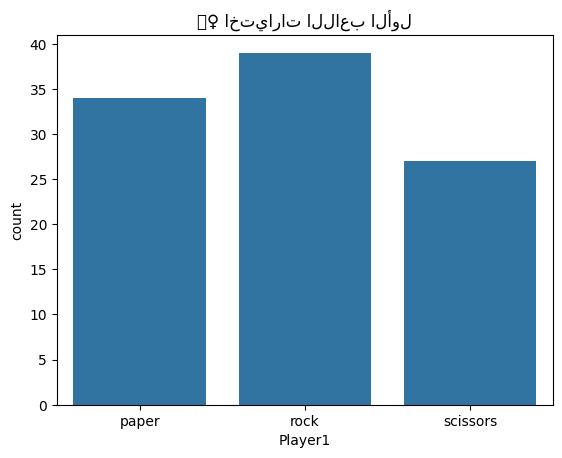

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129485 (\N{STANDING PERSON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


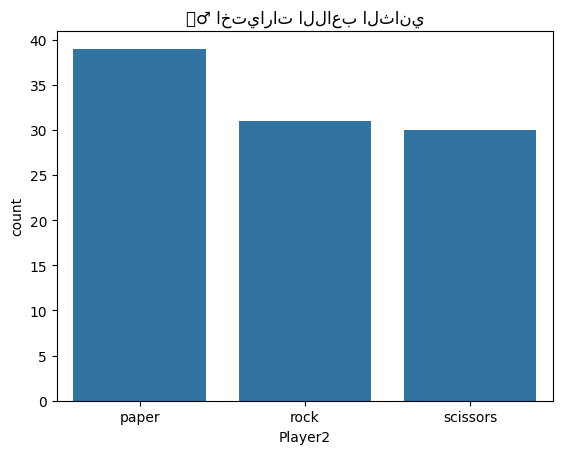

In [10]:
# توزيع اختيارات Player1
sns.countplot(x="Player1", data=df)
plt.title("🧍‍♀️ اختيارات اللاعب الأول")
plt.show()

# توزيع اختيارات Player2
sns.countplot(x="Player2", data=df)
plt.title("🧍‍♂️ اختيارات اللاعب الثاني")
plt.show()

In [11]:
# عدد مرات الفوز للاعب الأول
wins_count = df[df["Result"] == "win"].shape[0]
print(f"عدد مرات الفوز في اللعبة: {wins_count}")

عدد مرات الفوز في اللعبة: 37


In [12]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

# ترميز Player1 و Player2 و Result إلى أرقام
le_player1 = LabelEncoder()
le_player2 = LabelEncoder()
le_result = LabelEncoder()

df_encoded["Player1"] = le_player1.fit_transform(df_encoded["Player1"])
df_encoded["Player2"] = le_player2.fit_transform(df_encoded["Player2"])
df_encoded["Result"] = le_result.fit_transform(df_encoded["Result"])  # win=2, lose=1, draw=0 (مثلاً)
df_encoded.head()

,Player1,Player2,Result
0,0,0,0
1,0,1,2
2,1,0,1
3,1,1,0
4,1,1,0


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


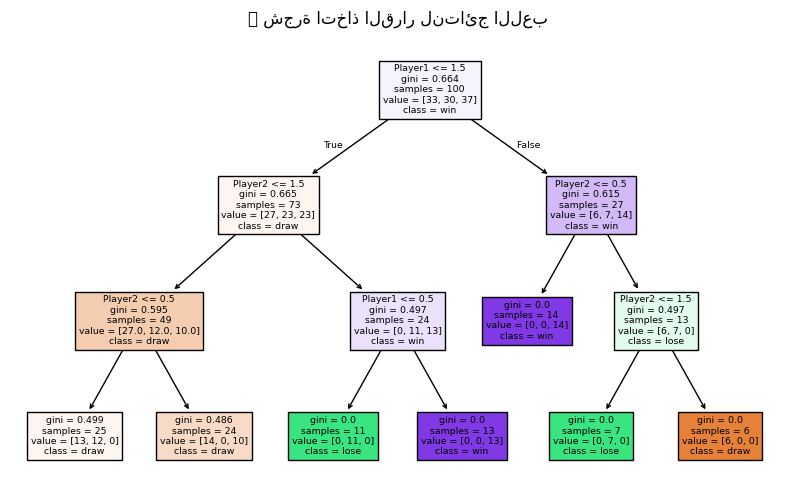

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# ميزات الإدخال: Player1 و Player2
X = df_encoded[["Player1", "Player2"]]
y = df_encoded["Result"]

# تدريب النموذج
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X, y)

# عرض الشجرة
plt.figure(figsize=(10,6))
plot_tree(clf, feature_names=["Player1", "Player2"], class_names=le_result.classes_, filled=True)
plt.title("🌳 شجرة اتخاذ القرار لنتائج اللعب")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


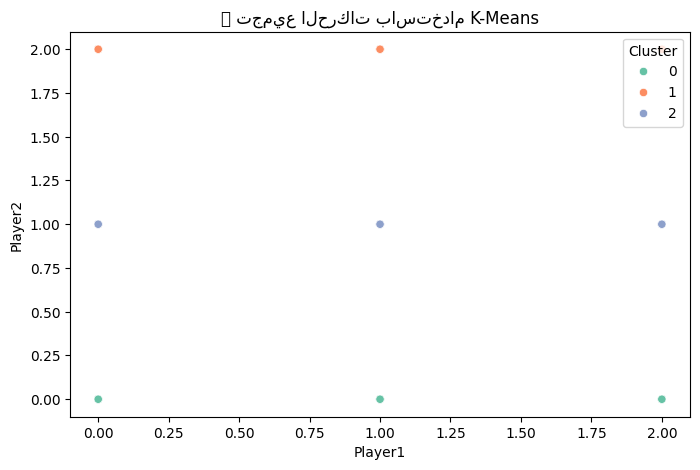

In [14]:
from sklearn.cluster import KMeans

# استخدام نفس الميزات
kmeans = KMeans(n_clusters=3, random_state=0)
df_encoded["Cluster"] = kmeans.fit_predict(X)

# رسم التجمعات
plt.figure(figsize=(8,5))
sns.scatterplot(x="Player1", y="Player2", hue="Cluster", data=df_encoded, palette="Set2")
plt.title("🎯 تجميع الحركات باستخدام K-Means")
plt.show()

In [15]:
# تكرار كل حركة من Player1 ضد Player2
move_pairs = df.groupby(["Player1", "Player2"]).size().reset_index(name="Count")

# عرض أعلى الحركات تكرارًا
move_pairs.sort_values(by="Count", ascending=False).head(10)

,Player1,Player2,Count
4,rock,rock,14
6,scissors,paper,14
0,paper,paper,13
5,rock,scissors,13
3,rock,paper,12
2,paper,scissors,11
1,paper,rock,10
7,scissors,rock,7
8,scissors,scissors,6


In [16]:
total = len(df)
win_count = (df["Result"] == "win").sum()
lose_count = (df["Result"] == "lose").sum()
draw_count = (df["Result"] == "draw").sum()

print("📊 إحصائيات عامة:")
print(f"🟢 نسبة الفوز: {win_count / total:.2%}")
print(f"🔴 نسبة الخسارة: {lose_count / total:.2%}")
print(f"⚪ نسبة التعادل: {draw_count / total:.2%}")

📊 إحصائيات عامة:
🟢 نسبة الفوز: 37.00%
🔴 نسبة الخسارة: 30.00%
⚪ نسبة التعادل: 33.00%
